Load Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Creating Dataset

In [2]:
# loading dataset
data = []
labels = []
#classes={'ain':0,'lam':1,'alef':2}

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
for i in range(10):
    path = '/content/drive/MyDrive/ML project/character recognition/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img,0)
            #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image_fromarray = Image.fromarray(image, 'L')
            resize_image = image_fromarray.resize((32, 32))
            data.append(np.array(resize_image))
            labels.append(i)
        except:
            print("Error - Image loading")

/content/drive/MyDrive/ML project/character recognition/Train/0
/content/drive/MyDrive/ML project/character recognition/Train/1
/content/drive/MyDrive/ML project/character recognition/Train/2
/content/drive/MyDrive/ML project/character recognition/Train/3
/content/drive/MyDrive/ML project/character recognition/Train/4
/content/drive/MyDrive/ML project/character recognition/Train/5
/content/drive/MyDrive/ML project/character recognition/Train/6


In [ ]:
pd.Series(labels).value_counts()

2    480
1    480
0    480
dtype: int64

In [ ]:
data[0].shape

(32, 32)

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)

(1440, 32, 32) (1440,)


Analyze Data

1


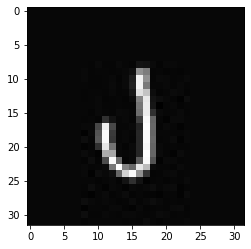

In [ ]:
plt.imshow(data[830],cmap='gray')
print(labels[830])

Prepare Data

In [ ]:
data_new = data.reshape(len(data),-1)
print(data_new.shape)
print(labels.shape)

(1440, 1024)
(1440,)


In [ ]:
data.shape,data.ndim,data_new.ndim

((1440, 32, 32), 3, 2)

Split Data

In [ ]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data_new, labels, test_size=0.2, random_state=42)

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: 
# for training data and for testing data. With this function, you don't need to divide the dataset manually. 
# By default, Sklearn train_test_split will make random partitions for the two subsets.
# arrays: Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
# test_size: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
    #If int, represents the absolute number of test samples. 
# random_state: Controls the shuffling applied to the data before applying the split. 
    #Pass an int for reproducible output across multiple function calls.        

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1152, 1024), (288, 1024), (1152,), (288,))

Feature Scaling

In [ ]:
print(X_train.max())
print(X_test.max())

X_train = X_train/223 
X_test = X_test/222

print(X_train.max())
print(X_test.max())   

223
222
1.0
1.0


In [ ]:
y_test[:10]

array([0, 1, 1, 0, 1, 2, 2, 2, 2, 0])

Train Model

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Prediction

In [ ]:
tr_pred = log.predict(X_train)
ts_pred = log.predict(X_test)

Evaluation

In [ ]:
print("Training Score", accuracy_score(y_train,tr_pred))
print("Testing Score", accuracy_score(y_test,ts_pred))

Training Score 0.9869791666666666
Testing Score 0.9201388888888888


Testing

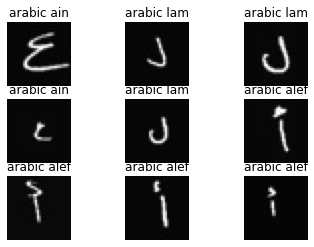

In [ ]:
decode = {0:'arabic ain',1:'arabic lam',2:'arabic alef'}
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    plt.title(decode[ts_pred[i]])
    plt.axis('off')

In [ ]:
np.where(ts_pred!=y_test)
d = pd.DataFrame({'Actual':y_test,'Prediction':ts_pred})
d[d['Actual']!=d['Prediction']]

,Actual,Prediction
17,1,0
56,0,1
67,0,1
95,0,1
97,2,0
98,2,1
115,1,2
121,0,1
123,0,1
128,0,1
